Gary Machorro Assignment 3 for CS 4990

In [1]:
#access my google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!pwd

/content


In [8]:
!ls -1

drive
gdrive
sample_data


In [9]:
#importing the necessary for keras and tf
import sys
import cv2
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import os
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.utils import np_utils
from tensorflow.python.keras.models import Sequential, Model
from tensorflow.python.keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
from tensorflow.python.keras.layers.convolutional import Conv2D, MaxPooling2D 
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.python.keras.applications import VGG19, ResNet50, InceptionV3
sys.version

Using TensorFlow backend.


'3.6.8 (default, Jan 14 2019, 11:02:34) \n[GCC 8.0.1 20180414 (experimental) [trunk revision 259383]]'

In [10]:
!ls -l gdrive/'My Drive'/'Colab Notebooks/flower_photos'

total 429
drwx------ 2 root root   4096 Jun 18 19:59 daisy
drwx------ 2 root root   4096 Jun 18 19:59 dandelion
-rw------- 1 root root 418049 Jun 18 19:59 LICENSE.txt
drwx------ 2 root root   4096 Jun 18 19:59 roses
drwx------ 2 root root   4096 Jun 18 19:59 sunflowers
drwx------ 2 root root   4096 Jun 18 19:59 tulips


LOADING THE FILE

In [0]:
#path needed to reach the flowers from my drive
base_path = 'gdrive/My Drive/Colab Notebooks/flower_photos/'
categories = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [12]:
#loading the file names 
fnames = []
for category in categories:
    flower_folder = os.path.join(base_path, category)
    file_names = os.listdir(flower_folder)
    full_path = [os.path.join(flower_folder, file_name) for file_name in file_names]
    fnames.append(full_path)
print('length for each category:', [len(f) for f in fnames])

length for each category: [633, 898, 641, 699, 799]


In [0]:
#LOADING IMAGES
images = []
for names in fnames:
    one_category_images = [cv2.imread(name) for name in names if (cv2.imread(name)) is not None]
    images.append(one_category_images)
    
   

In [14]:
print('number of images for each category:', [len(f) for f in images]) 

number of images for each category: [633, 898, 641, 699, 799]


In [15]:
#SHAPE FOR THE IMAGES
for i,imgs in enumerate(images):
    shapes = [img.shape for img in imgs]
    widths = [shape[0] for shape in shapes]
    heights = [shape[1] for shape in shapes]
    print('%d,%d is the min shape for %s' % (np.min(widths), np.min(heights), categories[i]))

180,158 is the min shape for daisy
211,146 is the min shape for dandelion
200,159 is the min shape for roses
180,152 is the min shape for sunflowers
159,143 is the min shape for tulips


In [0]:
#convert cv2 BGR format to RGB for showing
def cvtRGB(img):
    return cv2.cvtColor(img.copy(), cv2.COLOR_BGR2RGB)

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


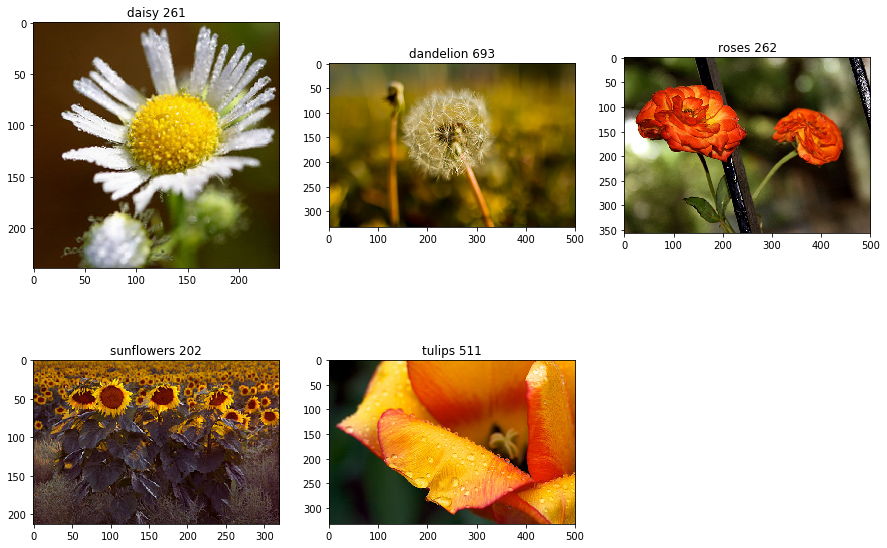

In [17]:
#printing of samples of images for each category
plt.figure(figsize=(15,10))
for i, imgs in enumerate(images):
    plt.subplot(2,3,i+1)
    idx = np.random.randint(len(imgs))
    plt.imshow(cvtRGB(imgs[idx]))
    plt.grid('off')
    plt.title(categories[i]+' '+str(idx))
plt.show()

In [18]:
#RESIZING IMAGES to 256*256
img_width, img_height = 256, 256

img = images[3][659]
print(img.shape)
resized_img = resize(img, (img_width, img_height, 3))#resizing the image
resized_img2 = cv2.resize(img,(img_width, img_height), interpolation = cv2.INTER_CUBIC)#resized with cv2
print(resized_img.shape)


(332, 500, 3)
(256, 256, 3)


In [0]:
# Apply resize to all images in the set
resized_images = []
for i,imgs in enumerate(images):
    resized_images.append([cv2.resize(img, (img_width, img_height), interpolation = cv2.INTER_CUBIC) for img in imgs])

In [0]:
#80-20 split for testing and validation
train_images = []#creation of the arrays for train and validation
val_images = []
for imgs in resized_images:
    train, test = train_test_split(imgs, train_size=0.8, test_size=0.2)#80-20 and placing into arrays
    train_images.append(train)
    val_images.append(test)

In [23]:
#CREATE LABELS
len_train_images = [len(imgs) for imgs in train_images]
print(len_train_images)
print('sum of train images:', np.sum(len_train_images))
train_categories = np.zeros((np.sum(len_train_images)), dtype='uint8')#obtain zero matrix
for i in range(5):
    if i is 0:
        train_categories[:len_train_images[i]] = i
    else:
        train_categories[np.sum(len_train_images[:i]):np.sum(len_train_images[:i+1])] = i
        
len_val_images = [len(imgs) for imgs in val_images]
print(len_val_images)
print('sum of val_images:', np.sum(len_val_images))
val_categories = np.zeros((np.sum(len_val_images)), dtype='uint8')#obtain zero matrix
for i in range(5):
    if i is 0:
        val_categories[:len_val_images[i]] = i
    else:
        val_categories[np.sum(len_val_images[:i]):np.sum(len_val_images[:i+1])] = i

[506, 718, 512, 559, 639]
sum of train images: 2934
[127, 180, 129, 140, 160]
sum of val_images: 736


In [0]:
#numpy array conversing
tmp_train_imgs = []
tmp_val_imgs = []#create arrays
for imgs in train_images:
    tmp_train_imgs += imgs
for imgs in val_images:
    tmp_val_imgs += imgs
train_images = np.array(tmp_train_imgs)
val_images = np.array(tmp_val_imgs)#convert class labels to binary class labels

In [25]:
#view shape of data after conversion to numpy array
train_data = train_images.astype('float32')
val_data = val_images.astype('float32')
train_labels = np_utils.to_categorical(train_categories, len(categories))
val_labels = np_utils.to_categorical(val_categories, len(categories))
print()
print('After converting')
print('train data:', train_data.shape)
print('train labels:', train_labels.shape)


After converting
train data: (2934, 256, 256, 3)
train labels: (2934, 5)


In [0]:
#randomize data and labels(training and testing)
seed = 100
np.random.seed(seed)
np.random.shuffle(train_data)
np.random.seed(seed)
np.random.shuffle(train_labels)
np.random.seed(seed)
np.random.shuffle(val_data)
np.random.seed(seed)
np.random.shuffle(val_labels)

In [27]:
train_data = train_data[:3400]
train_labels = train_labels[:3400]
val_data = val_data[:860]
val_labels = val_labels[:860]
print('shape of train data:', train_data.shape)
print('shape of train labels:', train_labels.shape)
print('shape of val data:', val_data.shape)
print('shape of val labels:', val_labels.shape)

shape of train data: (2934, 256, 256, 3)
shape of train labels: (2934, 5)
shape of val data: (736, 256, 256, 3)
shape of val labels: (736, 5)


 MODEL 1: CNN


In [0]:

def make_cnn_model():


    model = Sequential()#creation of a sequential model
    model.add(Conv2D(32, (3,3), padding='same', input_shape=train_data.shape[1:], activation='relu', name='conv_1'))#2d conv layer with 32 as output space and input shape the same as train data
    model.add(Conv2D(32, (3,3), activation='relu', name='conv_2'))#2d conv layer with 32 as output space and kernal size 3,3 with relu activation
    model.add(MaxPooling2D(pool_size=(2,2), name='maxpool_1'))#max pooling for spatial data
    model.add(Dropout(0.25))#at 0.25

    model.add(Conv2D(64, (3,3), padding='same', activation='relu', name='conv_3'))
    model.add(Conv2D(64, (3,3), activation='relu', name='conv_4'))#same as above
    model.add(MaxPooling2D(pool_size=(2,2), name='maxpool_2'))#second maxpool
    model.add(Dropout(0.25))#at 0.25
    
    model.add(Conv2D(128, (3,3), padding='same', activation='relu', name='conv_5'))
    model.add(Conv2D(128, (3,3), activation='relu', name='conv_6'))#same as abouve
    model.add(MaxPooling2D(pool_size=(2,2), name='maxpool_3'))#3rd maxpool

    model.add(Flatten())#flattens data
    model.add(Dense(512, activation='relu', name='dense_1'))#dense layer with 512 output space and relu activation
    model.add(Dropout(0.5))# at half to help prevent overfitting
    model.add(Dense(128, activation='relu', name='dense_2'))#dense layer with 512 output space and relu activation
    model.add(Dense(len(categories), name='output'))#dense layer with output space of the length of categories
    model.add(Activation('softmax'))#using softmax activation

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc']) 
    #the extension to the gradient descent 
    #common method for multiclass classification
    #measures the fraction of images that are correctly classified
    
    return model

In [29]:

cnnModel = make_cnn_model()#print model stats
cnnModel.summary()

W0624 04:47:03.250955 140548494731136 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
conv_2 (Conv2D)              (None, 254, 254, 32)      9248      
_________________________________________________________________
maxpool_1 (MaxPooling2D)     (None, 127, 127, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 127, 127, 32)      0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 127, 127, 64)      18496     
_________________________________________________________________
conv_4 (Conv2D)              (None, 125, 125, 64)      36928     
_________________________________________________________________
maxpool_2 (MaxPooling2D)     (None, 62, 62, 64)        0

MODEL 2: VGG19

In [0]:

def make_model_VGG19():
    model = VGG19(weights = "imagenet", include_top=False, input_shape = (img_width, img_height, 3))
  
    # Freeze the first five layers
    for layer in model.layers[:1]:
      layer.trainable = False
    #Adding custom Layers which  include an output,flatten, 2 dense layers and a droupout layer 
    x = model.output
    x = Flatten()(x)
    x = Dense(1024, activation="relu")(x)#dense with 1024 output and relu activation
    x = Dropout(0.5)(x)#drouput set at half 
    x = Dense(1024, activation="relu")(x)#same as above
    predictions = Dense(len(categories), activation="softmax")(x)
    
    # creating the final model 
    final_model = Model(inputs = model.input, outputs = predictions)#final model uses the inputs of the model as well as the outputs for preditcions and then returns it
    
    final_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc']) 
    #the extension to the gradient descent 
    #common method for multiclass classification
    #measures the fraction of images that are correctly classified
    return final_model

In [31]:
VGG19model = make_model_VGG19()#print the model
VGG19model.summary()

80142336/80134624 [==============================] - 3s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______________________________________________________________

In [0]:
#batch size and epochs for the models to use
batch_size = 32
epochs1 = 30#model 1 uses this
epochs2 = 10#model 2 uses this


In [0]:
# Adding rescale, rotation_range, width_shift_range, height_shift_range,
# shear_range, zoom_range, and horizontal flip to our ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.4,
    height_shift_range=0.4,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True
)

# Note that the validation data should not be augmented!
val_datagen = ImageDataGenerator(
    rescale=1./255,
#     rotation_range=40,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True
)

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow(
    train_data,
    train_labels,
    batch_size=batch_size
)

val_generator = val_datagen.flow(
    val_data,
    val_labels,
    batch_size=batch_size
)

In [34]:
#Fitting the cnn model
model = cnnModel.fit_generator(
    generator=train_generator, 
    steps_per_epoch=len(train_data)/batch_size,   # -> 106 # images 3392 = steps * batch_size = 106 * 32 
    epochs=epochs1, 
    validation_steps=len(val_data)/batch_size, # -> 26 # images 832 = steps * batch_size = 26 * 32
    validation_data=val_generator, 
    verbose=2#see the data for each iteration
)

Epoch 1/30
92/91 - 62s - loss: 1.6227 - acc: 0.2655 - val_loss: 1.5099 - val_acc: 0.3193
Epoch 2/30
92/91 - 56s - loss: 1.4521 - acc: 0.3412 - val_loss: 1.3681 - val_acc: 0.3777
Epoch 3/30
92/91 - 56s - loss: 1.3585 - acc: 0.3838 - val_loss: 1.3107 - val_acc: 0.4158
Epoch 4/30
92/91 - 56s - loss: 1.3095 - acc: 0.4366 - val_loss: 1.2815 - val_acc: 0.4715
Epoch 5/30
92/91 - 56s - loss: 1.2729 - acc: 0.4605 - val_loss: 1.2582 - val_acc: 0.4198
Epoch 6/30
92/91 - 56s - loss: 1.2302 - acc: 0.4809 - val_loss: 1.1913 - val_acc: 0.4878
Epoch 7/30
92/91 - 56s - loss: 1.1677 - acc: 0.5003 - val_loss: 1.1450 - val_acc: 0.5027
Epoch 8/30
92/91 - 56s - loss: 1.1284 - acc: 0.5174 - val_loss: 1.0926 - val_acc: 0.5353
Epoch 9/30
92/91 - 56s - loss: 1.1290 - acc: 0.5160 - val_loss: 1.1010 - val_acc: 0.5421
Epoch 10/30
92/91 - 56s - loss: 1.0951 - acc: 0.5297 - val_loss: 1.0818 - val_acc: 0.5258
Epoch 11/30
92/91 - 56s - loss: 1.0846 - acc: 0.5344 - val_loss: 1.1077 - val_acc: 0.5489
Epoch 12/30
92/91 -

In [35]:
#Vgg model fitting
VGG19_stats = VGG19model.fit_generator(
    generator=train_generator, 
    steps_per_epoch=len(train_data)/batch_size,   #  106 # images 3392 = steps * batch_size = 106 * 32 
    epochs=epochs2, 
    validation_steps=len(val_data)/batch_size, # 26 # images 832 = steps * batch_size = 26 * 32
    validation_data=val_generator,
    verbose=2
)

Epoch 1/10
92/91 - 132s - loss: 1.9759 - acc: 0.2267 - val_loss: 1.6012 - val_acc: 0.2446
Epoch 2/10
92/91 - 114s - loss: 1.6014 - acc: 0.2447 - val_loss: 1.6004 - val_acc: 0.2446
Epoch 3/10
92/91 - 114s - loss: 1.6008 - acc: 0.2447 - val_loss: 1.6013 - val_acc: 0.2446
Epoch 4/10
92/91 - 114s - loss: 1.6017 - acc: 0.2447 - val_loss: 1.6006 - val_acc: 0.2446
Epoch 5/10
92/91 - 114s - loss: 1.6023 - acc: 0.2396 - val_loss: 1.6004 - val_acc: 0.2446
Epoch 6/10
92/91 - 114s - loss: 1.6016 - acc: 0.2447 - val_loss: 1.6006 - val_acc: 0.2446
Epoch 7/10
92/91 - 114s - loss: 1.6012 - acc: 0.2447 - val_loss: 1.6010 - val_acc: 0.2446
Epoch 8/10
92/91 - 114s - loss: 1.6013 - acc: 0.2447 - val_loss: 1.6003 - val_acc: 0.2446
Epoch 9/10
92/91 - 114s - loss: 1.6017 - acc: 0.2447 - val_loss: 1.6005 - val_acc: 0.2446
Epoch 10/10
92/91 - 114s - loss: 1.6011 - acc: 0.2447 - val_loss: 1.6003 - val_acc: 0.2446


In [0]:
# Plots for training and testing process: loss and accuracy

def plot_model_history(model_name, history, epochs):#uses the stats of the models to plot training accuracy vs validation accuracy
  #as well as the training loss vs validation loss
  print(model_name)
  plt.figure(figsize=(15, 5))
  
  # summarize history for accuracy
  plt.subplot(1, 2 ,1)
  plt.plot(np.arange(0, len(history['acc'])), history['acc'], 'r')
  plt.plot(np.arange(1, len(history['val_acc'])+1), history['val_acc'], 'g')
  plt.xticks(np.arange(0, epochs+1, epochs/10))
  plt.title('Training Accuracy vs. Validation Accuracy')
  plt.xlabel('Num of Epochs')#x
  plt.ylabel('Accuracy')#y
  plt.legend(['train', 'validation'], loc='best')
  
  plt.subplot(1, 2, 2)#plotting of the history of the models
  plt.plot(np.arange(1, len(history['loss'])+1), history['loss'], 'r')
  plt.plot(np.arange(1, len(history['val_loss'])+1), history['val_loss'], 'g')
  plt.xticks(np.arange(0, epochs+1, epochs/10))
  plt.title('Training Loss vs. Validation Loss')
  plt.xlabel('Num of Epochs')#x
  plt.ylabel('Loss')#y
  plt.legend(['train', 'validation'], loc='best')
  
  
  plt.show()

cnnModel


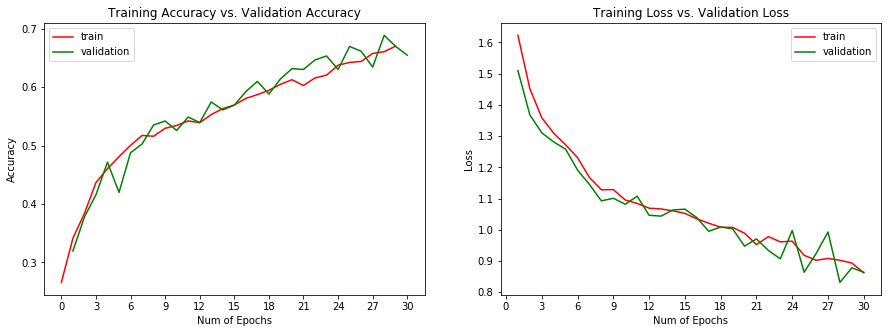

VGG19model


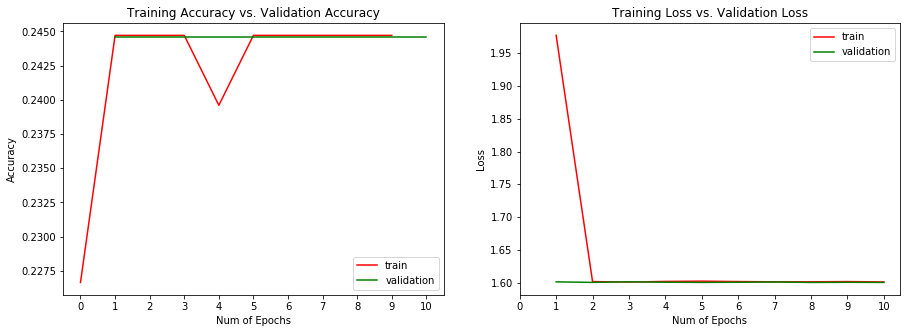

In [37]:
plot_model_history('cnnModel', model.history, epochs1)#use function for each model to compare
plot_model_history('VGG19model', VGG19_stats.history, epochs2)
